In [2]:
from modules import computenlttcepstro
import matplotlib.pyplot as plt
import pickle as pk
import numpy as np
import os
%matplotlib notebook

/home/endrigo/anaconda3/lib/python3.8/site-packages/sportran/plotter/style.py:39: UserWarning: The plot style api_style.mplstyle could not be loaded.
  warn('The plot style {} could not be loaded.'.format(plot_style_filename))


In [3]:
root='/scratch/endrigo/spce/dump05fs/'
if os.path.exists(root + 'enk.npy'):
    enka = np.load(root + 'enk.npy')
else:
    with open(root + 'enk.pkl', 'rb') as f:
        enk = pk.load(f)
    print(root + 'enk.pkl' + ' loaded correctly')
    np.save(root + 'enk.npy', np.array(enk))
    enk=0 #mi serve per deallocare la memoria dalla ram, trova un modo piu' bello magari...
    enka=np.load(root + 'enk.npy')
    

In [4]:
j, jf, kk, dk, sdk=computenlttcepstro.computenlttcepstro_k(root=root,
                                     Np=1536,
                                     L=[24.851017, 24.851017, 24.851017],
                                     nk=100,
                                     cp=68.296,
                                     deltat=0.0005,
                                     tdump=5,
                                     kv=None,
                                     nuk=10,
                                     plot=True,
                                     kalone=enka)

START CALCULATION OF D(K)
find k from number
leggo file con i dati della densita` di energia
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.3778204917907715 seconds
calcolo l` oggetto corrente con sportran
Using single component code.
la frequenza di Nynquist e`   500.0
resalmplo il periodogramma fino a fstar:  125.0
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKIP =            62 steps
            

<IPython.core.display.Javascript object>


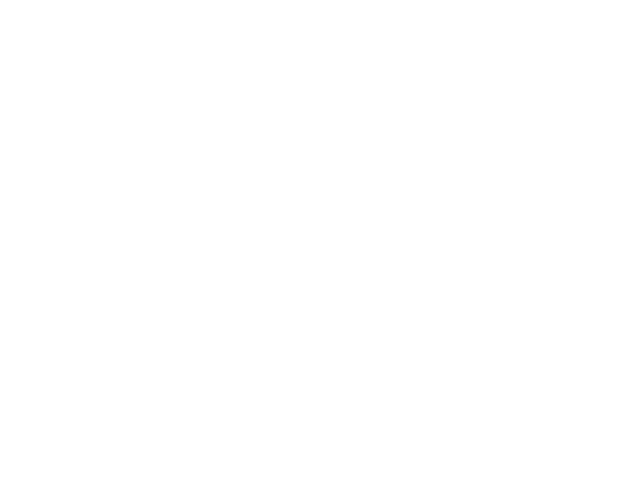

Text(0.5, 0, 'dumping_step')

In [5]:
f = plt.figure()
ax = plt.plot(j.timeseries(), j.traj);
plt.xlabel('dumping_step')

<IPython.core.display.Javascript object>


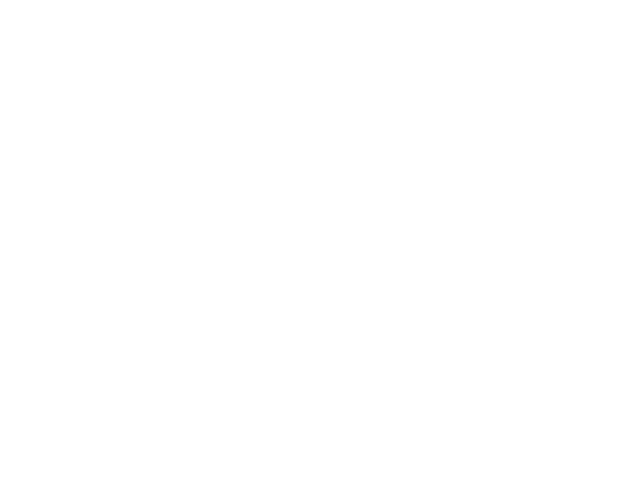

<IPython.core.display.Javascript object>


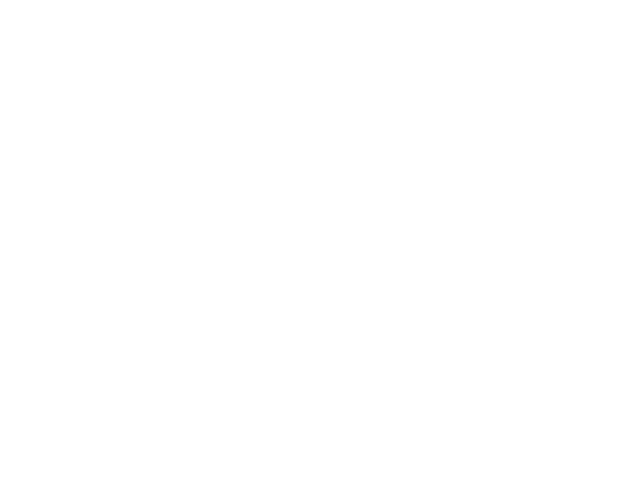

In [6]:
ax = j.plot_periodogram(PSD_FILTER_W=1, kappa_units=True)
ax = jf.plot_periodogram(PSD_FILTER_W=1, kappa_units=True)
#in x non sono Thz, sono in unita' arbitrarie....

<IPython.core.display.Javascript object>


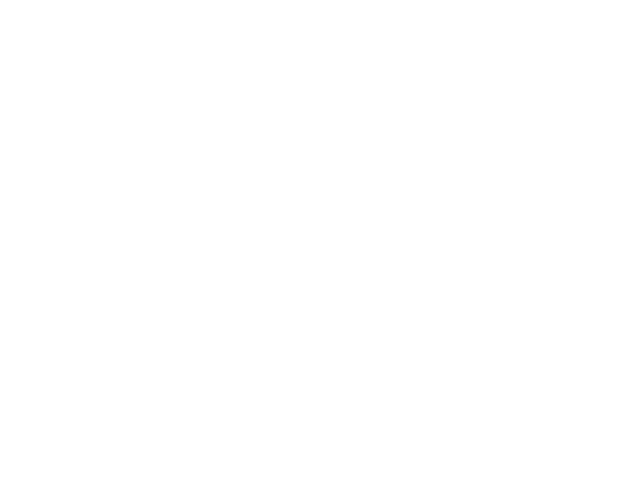

In [7]:
# filtered log-PSD

ax = j.plot_periodogram(0.5, kappa_units=True)
ax = jf.plot_periodogram(0.5, axes=ax, kappa_units=True)
ax = jf.plot_cepstral_spectrum(axes=ax, kappa_units=True)
ax[0].axvline(x = jf.Nyquist_f_THz, ls='--', c='r')
ax[1].axvline(x = jf.Nyquist_f_THz, ls='--', c='r')
plt.xlim([0, jf.Nyquist_f_THz+1])
ax[0].legend(['original', 'resampled', 'cepstrum-filtered'])
ax[1].legend(['original', 'resampled', 'cepstrum-filtered']);

<IPython.core.display.Javascript object>


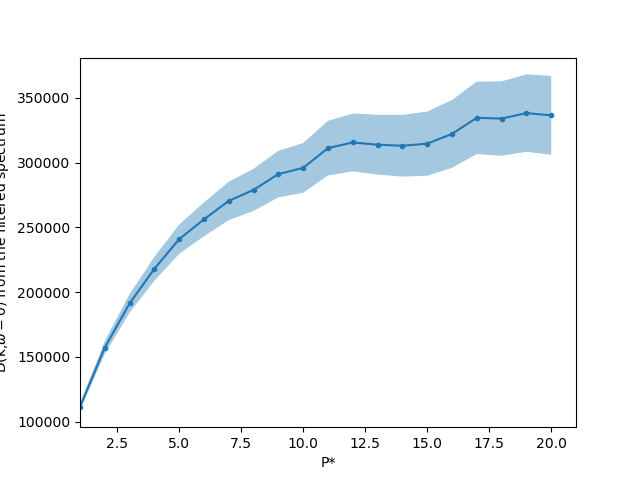

(1.0, 21.0)

In [9]:
f = plt.figure()
ax=plt.fill_between(range(len(jf.dct.tau))[1:jf.dct.aic_Kmin+10],(jf.dct.tau+jf.dct.tau_THEORY_std)[1:jf.dct.aic_Kmin+10],
                 (jf.dct.tau-jf.dct.tau_THEORY_std)[1:jf.dct.aic_Kmin+10], alpha=0.4)
ax=plt.plot(range(len(jf.dct.tau))[1:jf.dct.aic_Kmin+10],(jf.dct.tau)[1:jf.dct.aic_Kmin+10],marker='.')
plt.ylabel(r'D(k,$\omega=0$) from the filtered spectrum')
plt.xlabel('P*')
plt.xlim(1,jf.dct.aic_Kmin+10)

<IPython.core.display.Javascript object>


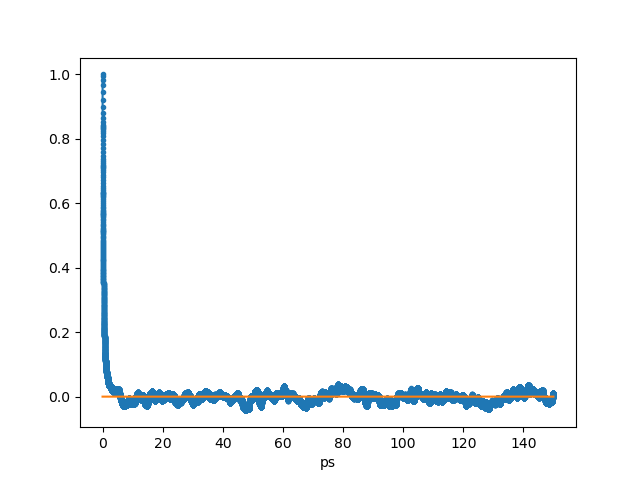

Text(0.5, 0, 'ps')

In [10]:
j.compute_acf()
f = plt.figure()
ax=plt.plot(np.linspace(0,60000,60000)*0.0005*5,  j.acfm[:60000]/j.acfm[0], marker='.')
ax=plt.plot(np.linspace(0,60000,60000)*0.0005*5,  np.zeros(60000))
plt.xlabel('ps')

In [11]:
#calcolo della d(k) per tutti i k calcolati alla lettura del file .lammpstrj
#can take some time, approx 1,7s per cycle

In [12]:
kk, dk, sdk=computenlttcepstro.computenlttcepstro(root=root,
                                     Np=1536,
                                     L=[24.851017, 24.851017, 24.851017],
                                     nk=100,
                                     nkk=100,
                                     cp=68.296,
                                     deltat=0.0005,
                                     tdump=5,
                                     nskip=1)

data loaded
start loop up to nkk
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.236825227737427 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKIP =            62 steps
                             =        62.000 fs
 Original  n. of frequencies =        200001
 Resampled n. of frequencies =          3226
 min(PSD)          (pre-filter&sam

977.0068083928512 976.2933511266513
0.0672213709927259 0.02897497294309426
kpoint  5 kvalue  0.2528354802413637 D(k) 0.8827049607595964 std D(k) 0.07320014873751785
DONE CALCULATION OF D(K), elapsed time: 11.321630477905273
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.103898286819458 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKIP =  

1002.692506901114 1002.6607896959879
0.03879713189228428 0.013159936135107944
kpoint  10 kvalue  0.5056696120231828 D(k) 0.5720617413177481 std D(k) 0.04096829703743398
DONE CALCULATION OF D(K), elapsed time: 11.548752546310425
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.178508996963501 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKIP

1163.5391996086646 1163.4199998525728
0.028489026614859376 0.005009911946049707
kpoint  15 kvalue  0.7585037438073992 D(k) 0.4621766613108112 std D(k) 0.028926179408441367
DONE CALCULATION OF D(K), elapsed time: 11.421372175216675
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.102395057678223 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TS

1487.937539362198 1487.5057957729223
0.018464393685384006 0.0039055647607062717
kpoint  20 kvalue  1.0113378755922147 D(k) 0.2272925923181769 std D(k) 0.018872924263847384
DONE CALCULATION OF D(K), elapsed time: 11.266576051712036
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.069457530975342 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TS

917.3329156650912 916.4451575809078
0.06615951248105047 0.03252946480462102
kpoint  25 kvalue  0.2528354802413637 D(k) 0.935684623278211 std D(k) 0.07372412883313949
DONE CALCULATION OF D(K), elapsed time: 11.403682231903076
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.074540376663208 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKIP = 

946.7200537108978 946.6023821588346
0.047257671666821155 0.01703425710164901
kpoint  30 kvalue  0.35756336519882337 D(k) 0.7666598514426545 std D(k) 0.050233986964744806
DONE CALCULATION OF D(K), elapsed time: 11.309731006622314
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.011035680770874 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKI

1062.7239648233192 1062.6326433557606
0.03095652205608317 0.00835418117550574
kpoint  35 kvalue  0.5653561148401088 D(k) 0.4776939216667559 std D(k) 0.03206397668602474
DONE CALCULATION OF D(K), elapsed time: 11.442631244659424
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.1408350467681885 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKI

1195.0999989688248 1194.802232784266
0.023422084004055613 0.005153569864465627
kpoint  40 kvalue  0.7995334323424297 D(k) 0.4276486498561515 std D(k) 0.023982353959546298
DONE CALCULATION OF D(K), elapsed time: 11.28844952583313
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.127609014511108 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKI

1511.4079670950916 1510.9140218568136
0.01748510559926342 0.0025291515571199334
kpoint  45 kvalue  1.0424634663482457 D(k) 0.3192492094564465 std D(k) 0.017667074613989583
DONE CALCULATION OF D(K), elapsed time: 11.305631637573242
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.155314922332764 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TS

1043.9526313255435 1043.8641971716866
0.03616615684876562 0.010148293191228458
kpoint  50 kvalue  0.5056696120231828 D(k) 0.49218421352754277 std D(k) 0.03756299716349389
DONE CALCULATION OF D(K), elapsed time: 11.34216833114624
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.12582802772522 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKIP

1047.7172521861994 1047.336101617073
0.034908467575951355 0.009943178779581617
kpoint  55 kvalue  0.5653561148401088 D(k) 0.5147235832709671 std D(k) 0.036296940817980364
DONE CALCULATION OF D(K), elapsed time: 11.524287223815918
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.139133453369141 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSK

1130.9330755625135 1130.8502276566865
0.026577144834546738 0.006610831779017934
kpoint  60 kvalue  0.7151248233993123 D(k) 0.4852548604794218 std D(k) 0.02738699918514162
DONE CALCULATION OF D(K), elapsed time: 11.528241395950317
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.275304317474365 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSK

1352.3552168556782 1352.1010397674086
0.02234095982061808 0.003599398731442371
kpoint  65 kvalue  0.9116082963027826 D(k) 0.3159650334396897 std D(k) 0.022629055590863274
DONE CALCULATION OF D(K), elapsed time: 11.536510944366455
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.213942766189575 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSK

1682.4093552246836 1681.601286894399
0.01814958923893301 0.0020353530929050514
kpoint  70 kvalue  1.130710420543472 D(k) 0.23832796356814523 std D(k) 0.018263358172986452
DONE CALCULATION OF D(K), elapsed time: 11.457234382629395
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.232550382614136 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSK

1205.217746583073 1205.0131361779495
0.02603459699774568 0.005252185746802323
kpoint  75 kvalue  0.7585037438073992 D(k) 0.40174308717031126 std D(k) 0.026559098176593684
DONE CALCULATION OF D(K), elapsed time: 11.411577463150024
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.167281866073608 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSK

1226.5304492586558 1225.898007633053
0.02259545652801816 0.005597644015669566
kpoint  80 kvalue  0.7995334323424297 D(k) 0.4431560113084038 std D(k) 0.02327849381372686
DONE CALCULATION OF D(K), elapsed time: 11.805373907089233
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.315179347991943 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSKIP

1346.0719767383016 1346.014923631675
0.02966813175754915 0.0037177884831926917
kpoint  85 kvalue  0.9116082963027826 D(k) 0.3199360449777776 std D(k) 0.029900167109717907
DONE CALCULATION OF D(K), elapsed time: 12.220963478088379
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.834408760070801 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TSK

1588.5046938391297 1588.4764112135845
0.019364232858857106 0.002864649499071072
kpoint  90 kvalue  1.0726862816006488 D(k) 0.31414539403335306 std D(k) 0.019574977163832642
DONE CALCULATION OF D(K), elapsed time: 11.342002868652344
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.771947383880615 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         T

1966.6685179818558 1966.4305078900302
0.017608601028341858 0.0020451966294188027
kpoint  95 kvalue  1.2641725467560825 D(k) 0.2236408874844101 std D(k) 0.01772697547322464
DONE CALCULATION OF D(K), elapsed time: 11.883918285369873
START CALCULATION OF D(K)
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  400001
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.288666248321533 seconds
Using single component code.
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =       8.06452 THz
 Sampling time         TS

<IPython.core.display.Javascript object>


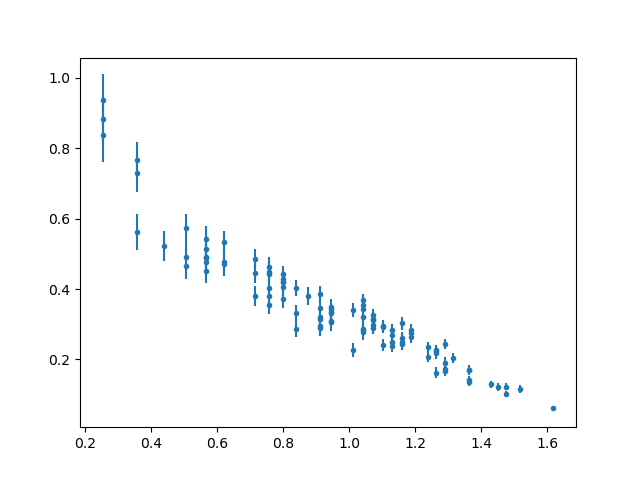

In [13]:
%matplotlib notebook
f = plt.figure()
ax = plt.errorbar(kk, dk, sdk, fmt='.')

In [15]:
with open(root+'nlttkcepstral.out', '+w') as f:
    for i in range(len(kk)):
        f.write('{}\t'.format(kk[i])+'{}\t'.format(dk[i])+'{}\n'.format(sdk[i]))